In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression  


> CHURN = yes (1) -> Customer left the telecom service  
> CHURN = No (0) -> Customer left the telecom service


In [46]:
df = pd.read_csv("telco_data .csv")

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df= df.drop(columns=['customerID'],axis=1)

In [49]:
df.isnull().sum()

gender               750
SeniorCitizen          0
Partner             1000
Dependents             0
tenure              2500
PhoneService           0
MultipleLines          0
InternetService     1000
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV         1500
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1500
TotalCharges           0
Churn                  0
dtype: int64

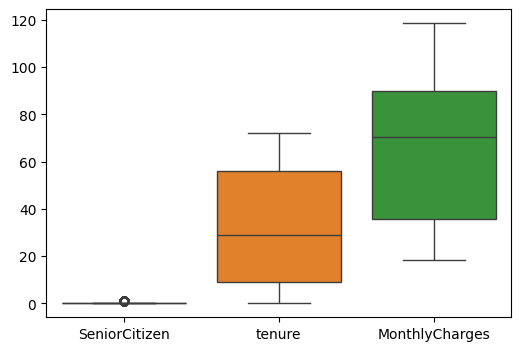

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(df)
plt.show()

>Converting TotalCharges datatype [ object to float ]

In [51]:
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=df["TotalCharges"].replace("",None)
df["TotalCharges"]=df['TotalCharges'].astype(float)
#or astype(float)

In [52]:
''' OR '''
# def clean_charges(val):
#     val = val.strip()
#     return None if val =='' else float(val)

' OR '

In [53]:
# df['TotalCharges']= df['TotalCharges'].apply(clean_charges)
# df['TotalCharges']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6293 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           6043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            4543 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   6043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       5543 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


>If more values are missing then we should not replace with mean , median or mode in above sceanrio 7400 entries - around 5000 are missing so we should use IMPUTATION...  
> IMPUTING -  it will find and replace the null values   
strategy - mean,median,constant,most_
fill_value - when strategy is constant we use fillvalue

In [55]:
# imputer = SimpleImputer(strategy='most_frequent') #mode
# df[["gender"]]=imputer.fit_transform(df[["gender"]]) #always 2D array

In [56]:
# df[df["gender"].isna()]

In [57]:
imputer = SimpleImputer(strategy='constant',fill_value="unknown") #replacing with constant value
df[["gender"]]=imputer.fit_transform(df[["gender"]])

In [58]:
df['gender'].value_counts()

gender
Male       3202
Female     3091
unknown     750
Name: count, dtype: int64

> Columntransformer & Pipeline

we cant pass multiple numerical columns so we use pipeline

In [59]:
x=  df.drop('Churn',axis=1)
y= df['Churn']

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [61]:
num_cols = x.select_dtypes(include="number").columns
obj_cols = x.select_dtypes(exclude="number").columns

In [62]:
#numerical_cols
num_preprocessing = Pipeline(
    steps=[
    ('imputer_num_cols',SimpleImputer(strategy='mean')),    
    ('StandardScaler',StandardScaler())        
]
)

In [63]:
#categorical_cols
cat_preprocessing = Pipeline(
    steps=[
    ('imputer_cat_cols',SimpleImputer(strategy='constant',fill_value="unknown")),    
    ('OrdinalEncoder',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))        
]   
)

In [64]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num_preprocessing',num_preprocessing,num_cols),    
        ('cat_preprocessing',cat_preprocessing,obj_cols)        
    ]
)

In [65]:
#MAIN PIPELINE
Pipeline = Pipeline(
    steps=[         
    ('preprocessing',preprocessing),
    ('model',LogisticRegression(max_iter=1000))
]
)
Pipeline.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_preprocessing', ...), ('cat_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
grid_search_cv= GridSearchCV(
    estimator= Pipeline, 
    param_grid={ 'model__C' : [0.01, 0.1, 1.0, 10],  #same name should be given coz pipeline LR (accessing )
                 'model__penalty' : ['l1', 'l2'],
                 'model__solver' : ['liblinear'],
                 'model__class_weight' : ['balanced', None]
                 },
    cv=10,
    verbose=0,
    n_jobs=-1,
)

In [67]:
grid_search_cv.fit(xtrain,ytrain)

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__class_weight': ['balanced', None], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_preprocessing', ...), ('cat_preprocessing', ...)]"
